Intercept: 51.51874589331264
Coefficient: [0.74675303]
Mean Squared Error: 22.943831174285705
R-squared: 0.5027090317576719


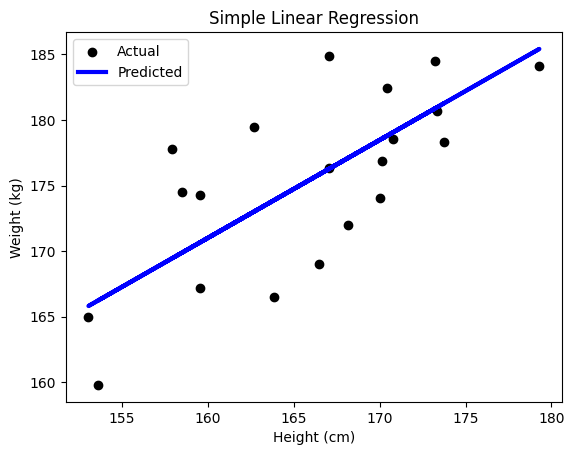

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
np.random.seed(0)
heights = 150 + 30 * np.random.rand(100)  
weights = 50 + 0.75 * heights + 5 * np.random.randn(100)  
data = pd.DataFrame({'Height': heights, 'Weight': weights})
X = data[['Height']].values
y = data['Weight'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
plt.scatter(X_test, y_test, color='black', label='Actual')
plt.plot(X_test, y_pred, color='blue', linewidth=3, label='Predicted')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.title('Simple Linear Regression')
plt.legend()
plt.show()

Intercept: 67.38474765657726
Coefficients: [0.40023763 0.13118441]
Mean Squared Error: 18.132636041130034
R-squared: 0.24525562610892115


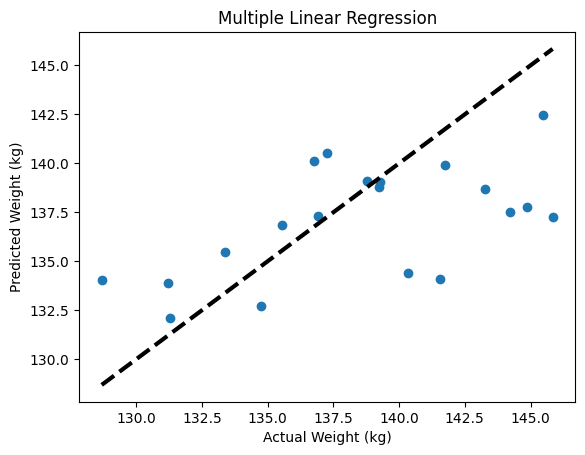

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
np.random.seed(0)
heights = 150 + 30 * np.random.rand(100) 
ages = 20 + 10 * np.random.rand(100)  
weights = 50 + 0.5 * heights + 0.2 * ages + 5 * np.random.randn(100)
data = pd.DataFrame({'Height': heights, 'Age': ages, 'Weight': weights})
X = data[['Height', 'Age']].values
y = data['Weight'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Weight (kg)')
plt.ylabel('Predicted Weight (kg)')
plt.title('Multiple Linear Regression')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(0)
heights = 150 + 30 * np.random.rand(100)  # Heights in cm
weights = 50 + 0.75 * heights + 5 * np.random.randn(100)  # Weights in kg

# Reshape the data
X = heights.reshape(-1, 1)
y = weights

# Normalize features
X = (X - np.mean(X)) / np.std(X)

def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1/(2*m)) * np.sum(np.square(predictions - y))
    return cost

def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = np.zeros(iterations)
    
    for it in range(iterations):
        prediction = np.dot(X, theta)
        theta = theta - (1/m) * learning_rate * (X.T.dot((prediction - y)))
        cost_history[it] = compute_cost(X, y, theta)
        
    return theta, cost_history

# Add intercept term to X
X_b = np.c_[np.ones((X.shape[0], 1)), X]
theta = np.random.randn(2)
learning_rate = 0.01
iterations = 1000

# Perform gradient descent
theta, cost_history = gradient_descent(X_b, y, theta, learning_rate, iterations)
print(f"Theta: {theta}")
print(f"Final cost: {cost_history[-1]}")

# Plot cost function history
plt.plot(range(iterations), cost_history, 'b.')
plt.xlabel("Number of iterations")
plt.ylabel("Cost (J)")
plt.title("Convergence of Gradient Descent")
plt.show()

# Plot the linear regression line
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, X_b.dot(theta), color='red', label='Regression Line')
plt.xlabel('Normalized Height')
plt.ylabel('Weight (kg)')
plt.title('Linear Regression using Gradient Descent')
plt.legend()
plt.show()
